#Muhammad Zhafran Ghaly

**M183X0348**

**M02 | Machine Learning and Front-End**

**Import Libraries**

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

**Data Collecting**

I used dataset from kaggle, https://www.kaggle.com/datasets/muamkh/ihsgstockdata/code

In [41]:
!pip install -q kaggle

from google.colab import files
files.upload()

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 515, in _det

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"muhammadzhafranghaly","key":"530c0d4fa236d3f43f7610cd1c9c24bf"}'}

In [42]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [60]:
!kaggle datasets download -d muamkh/ihsgstockdata

100% 258M/259M [00:04<00:00, 69.4MB/s]
100% 259M/259M [00:04<00:00, 60.5MB/s]


In [61]:
!unzip 'ihsgstockdata.zip'

Archive:  ihsgstockdata.zip
  inflating: DaftarSaham.csv         
  inflating: daily/AALI.csv          
  inflating: daily/ABBA.csv          
  inflating: daily/ABDA.csv          
  inflating: daily/ABMM.csv          
  inflating: daily/ACES.csv          
  inflating: daily/ACST.csv          
  inflating: daily/ADCP.csv          
  inflating: daily/ADES.csv          
  inflating: daily/ADHI.csv          
  inflating: daily/ADMF.csv          
  inflating: daily/ADMG.csv          
  inflating: daily/ADMR.csv          
  inflating: daily/ADRO.csv          
  inflating: daily/AGAR.csv          
  inflating: daily/AGII.csv          
  inflating: daily/AGRO.csv          
  inflating: daily/AGRS.csv          
  inflating: daily/AHAP.csv          
  inflating: daily/AIMS.csv          
  inflating: daily/AISA.csv          
  inflating: daily/AKKU.csv          
  inflating: daily/AKPI.csv          
  inflating: daily/AKRA.csv          
  inflating: daily/AKSI.csv          
  inflating: daily/ALD

In [97]:
df = pd.read_csv('/content/daily/BNII.csv')
df['timestamp'] = pd.to_datetime(df['timestamp']) 
df = df.set_index('timestamp')
print(f"Jumlah Baris = {df.shape[0]}")
df.head(5)

Jumlah Baris = 5600


,open,low,high,close,volume
timestamp,,,,,
2001-04-16,156,151,156,151,0
2001-04-17,156,151,156,151,0
2001-04-18,156,151,156,151,0
2001-04-19,156,151,156,151,0
2001-04-20,156,151,156,151,0


In [98]:
df['high'] = df['high'].astype(float)
df['open'] = df['open'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5600 entries, 2001-04-16 to 2022-09-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5600 non-null   float64
 1   low     5600 non-null   float64
 2   high    5600 non-null   float64
 3   close   5600 non-null   float64
 4   volume  5600 non-null   float64
dtypes: float64(5)
memory usage: 262.5 KB


#Exploratory Data Analysis(EDA)

* Transaction Unique Identifier : Pengenal transaksi unik
* Price : Harga dari rumah
* Date of Transfer : Data pengiriman biaya untuk membeli rumah
* Old/New : Kondisi rumah
* Duration : Lamanya kondisi rumah
* Town/city : Kota asal rumahnya
* District : Distrik
* Country : Tempat asal/Negara
* PDD Category Type : Kategori rumahnya
* Record Status - Monthly File only : Jejak dari status rumah



**Missing Value Check**

In [100]:
df.isnull().sum()

open      0
low       0
high      0
close     0
volume    0
dtype: int64

In [101]:
print('Null : ', df.isnull().sum().sum())

Null :  0


#Statistic Information

**Variable of Agricultural Dataset**

1. count adalah jumlah sampel pada dataset.
2. mean adalah nilai rata-rata dataset.
3. std adalah standar deviasi.
4. min adalah nilai minimum.
5. 25% adalah kuartil pertama.
6. 50% adalah kuartil kedua.
7. 75% adalah kuartil ketiga.
7. max adalah nilai maksimum



In [102]:
df.describe()

,open,low,high,close,volume
count,5600.000000,5600.000000,5600.000000,5600.000000,5.600000e+03
mean,271.666429,266.808929,276.000714,270.830000,2.696342e+07
std,114.574627,112.867513,117.832260,115.304638,9.357840e+07
min,115.000000,0.000000,0.000000,114.000000,0.000000e+00
25%,169.000000,165.000000,170.000000,169.000000,2.500375e+04
50%,258.000000,254.000000,264.000000,259.500000,6.232695e+05
75%,341.000000,338.000000,349.000000,340.000000,4.644133e+06
max,985.000000,985.000000,985.000000,985.000000,1.543403e+09


#Data Visualization

**This is the highest price from 2004 to 2020**

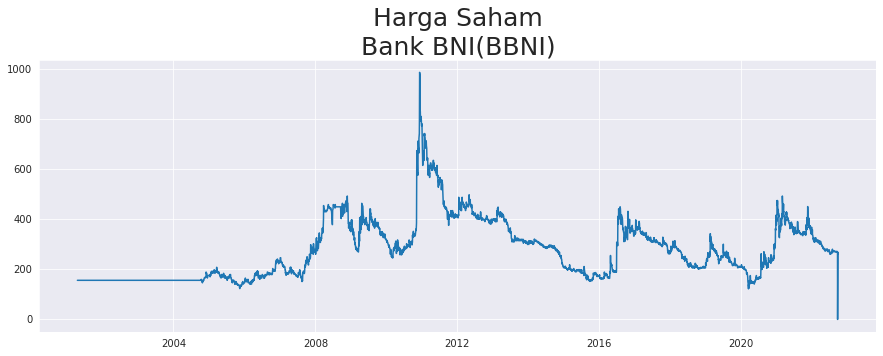

In [105]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df.index, df['high'])
plt.title("Harga Saham\nBank BNI(BBNI)", fontsize=25)
plt.show()

**Overcoming outliner**

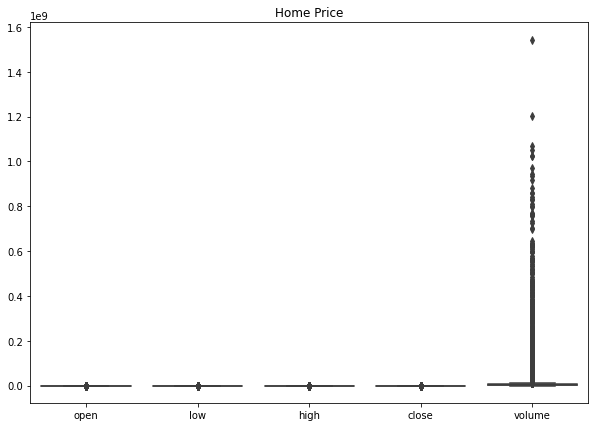

In [87]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.subplots(figsize=(10,7))
sns.boxplot(data=df[numerical_col]).set_title("Home Price")
plt.show()

By deleting data that is outside the IQR

In [88]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

(4444, 5)

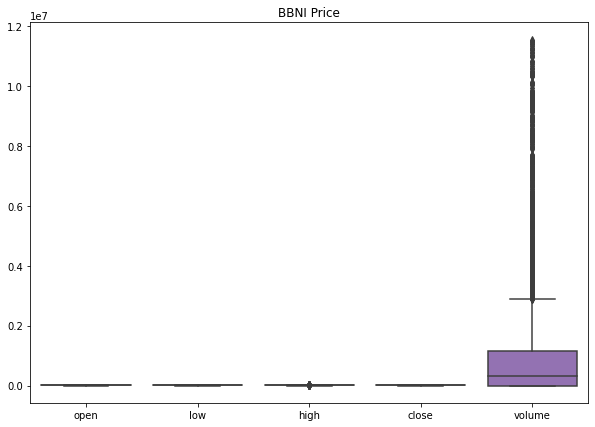

In [90]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.subplots(figsize=(10,7))
sns.boxplot(data=df[numerical_col]).set_title("BBNI Price")
plt.show()

#Unvariate Analysis

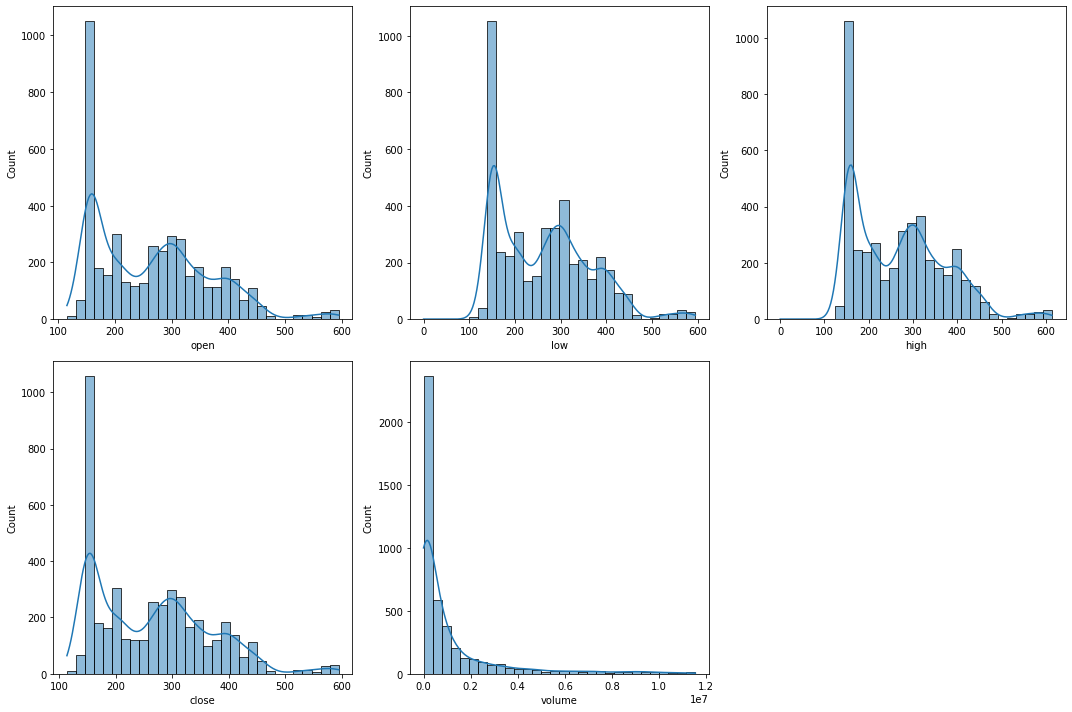

In [91]:
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col):
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x=df[col], bins=30, kde=True, ax=ax)
fig.tight_layout()
plt.show()

#Multivariate Analysis

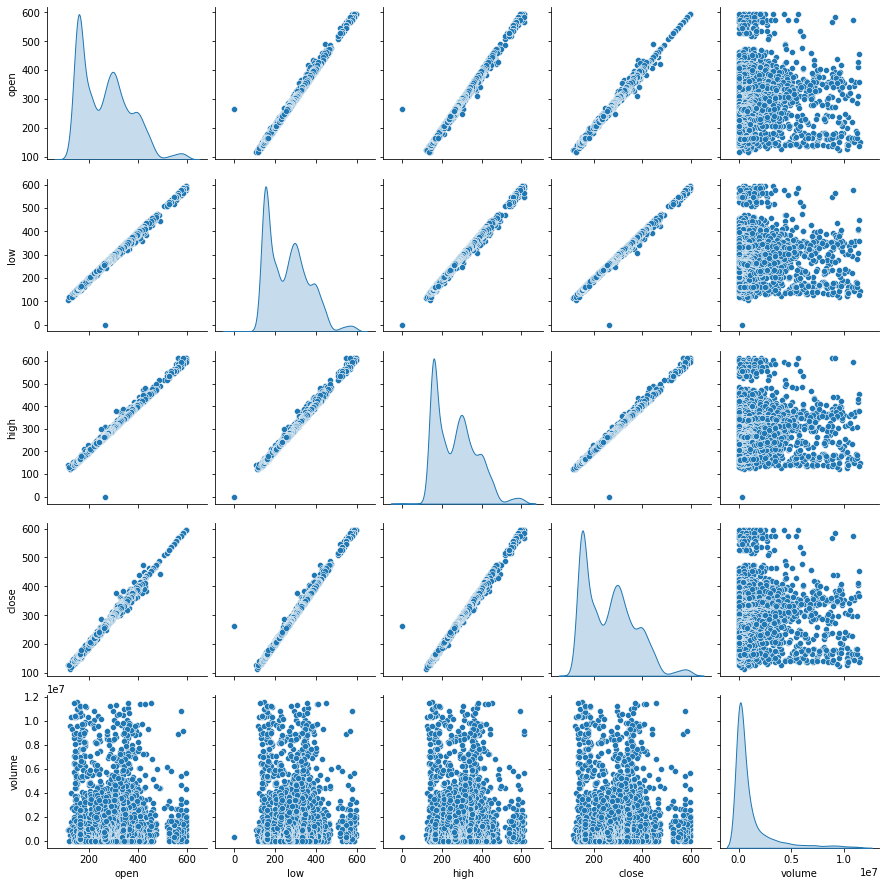

In [92]:
sns.pairplot(df[numerical_col], diag_kind='kde')
plt.show()

**Heatmap Correlation**

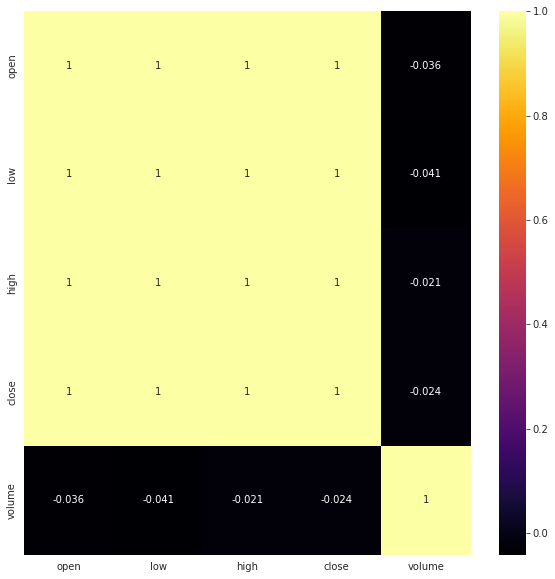

In [106]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[df.corr().index].corr(), annot = True, cmap = 'inferno')
plt.show()

Delete volume column

In [110]:
df2 = df.drop(['volume'], axis=1)
df2.head()

,open,low,high,close
timestamp,,,,
2001-04-16,156.0,151.0,156.0,151.0
2001-04-17,156.0,151.0,156.0,151.0
2001-04-18,156.0,151.0,156.0,151.0
2001-04-19,156.0,151.0,156.0,151.0
2001-04-20,156.0,151.0,156.0,151.0


#Splitting Data

In [112]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
                                  X, y, test_size=.2,
                                  random_state=42)

In [114]:
print('X_train :', len(X_train))
print('y_train :', len(y_train))
print('X_test  :', len(X_test))
print('y_test  :', len(y_test))

X_train : 4480
y_train : 4480
X_test  : 1120
y_test  : 1120


**Normalization**

Using Minmaxscaler() to speed up training of our data

In [116]:
scal = MinMaxScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

In [117]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['SVR', 'KNN', 'GradientBoosting'])

#Modeling

**Hyperparameter Tuning** is choosing a set of optimal hyperparameters for a learning algorithm

In [118]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv=5,
      verbose=1,
      n_jobs=6
  )

  return results

In [119]:
svr = SVR()
hyperparameters = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 10, 100, 1000],
    'gamma': [0.3, 0.03, 0.003, 0.0003]
}

svr_search = grid_search(svr, hyperparameters)
svr_search.fit(X_train, y_train)
print(svr_search.best_params_)
print(svr_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 1000, 'gamma': 0.3, 'kernel': 'rbf'}
0.9984737518979051


In [121]:
gradient_boost = GradientBoostingRegressor()
hyperparameters = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'n_estimators': [250, 500, 750, 1000],
    'criterion': ['friedman_mse', 'squared_error']
}

gradient_boost_search = grid_search(gradient_boost, hyperparameters)
gradient_boost_search.fit(X_train, y_train)
print(gradient_boost_search.best_params_)
print(gradient_boost_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 750}
0.9985253725484142


In [120]:
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': range(1, 10)
}

knn_search = grid_search(knn, hyperparameters)
knn_search.fit(X_train, y_train)
print(knn_search.best_params_)
print(knn_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 3}
0.9982811921042372


#Training Model

In [122]:
svr = SVR(C=1000, gamma=0.003, kernel='rbf')
svr.fit(X_train, y_train)

SVR(C=1000, gamma=0.003)

In [124]:
gradient_boost = GradientBoostingRegressor(criterion='squared_error',
                                           learning_rate=0.01, n_estimators=1000)
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01,
                          n_estimators=1000)

In [123]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

#Evaluation Model

In [125]:
model_dict = {
    'SVR': svr,
    'KNN': knn,
    'GradientBoosting': gradient_boost,
    
}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(X_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(X_test))

models.head()

,train_mse,test_mse
SVR,20.238574,55.526923
KNN,16.681362,51.308482
GradientBoosting,9.669641,36.336499


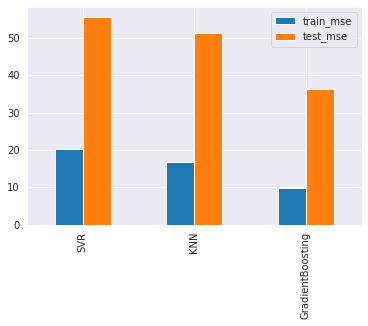

In [126]:
models.sort_values(by='test_mse', ascending=False).plot(kind='bar', zorder=3)

In [127]:
svr_acc = svr.score(X_test, y_test)*100
knn_acc = knn.score(X_test, y_test)*100
boosting_acc = gradient_boost.score(X_test, y_test)*100

**From the evaluation results below, it can provide information that the third model built has a performance above 99%. It can be seen that the model with the Gradient Boost algorithm has a performance measured by a better accuracy value than the other two models, namely the model with the SVR and KNN algorithms.**

In [128]:
evaluation_list = [[svr_acc], [knn_acc], [boosting_acc]]
evaluation = pd.DataFrame(evaluation_list,
                          columns = ['Accuracy (%)'],
                          index = ['SVR', 'KNN', 'Gradient Boost'])

evaluation

,Accuracy (%)
SVR,99.611262
KNN,99.640795
Gradient Boost,99.745612


In [132]:
X_30=X[-30:]
forecast=gradient_boost.predict(X_30)

In [133]:
forecast=pd.DataFrame(forecast,columns=['Forecast'])
bbni = df2.append(forecast)
bbni.drop(['high', 'low', 'open'],axis=1,inplace=True)

**The following is the predicted value for the next 30 days obtained from the best method, namely the previously prospective Gradient Boost**

In [134]:
bbni.tail(35)

,close,Forecast
2022-09-26 00:00:00,264.0,NaN
2022-09-27 00:00:00,262.0,NaN
2022-09-28 00:00:00,264.0,NaN
2022-09-29 00:00:00,260.0,NaN
2022-09-30 00:00:00,256.0,NaN
0,NaN,982.738266
1,NaN,982.738266
2,NaN,982.738266
3,NaN,982.738266
4,NaN,982.738266
